# コロナ感染者数をグラフ化する

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import requests
import io
from japanmap import picture

NHKの新型コロナウイルス特設サイトからのデータを使用する
https://www3.nhk.or.jp/news/special/coronavirus/data-widget/

CSV取得URL:https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv

In [5]:
url = "https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv"
r = requests.get(url).content
df = pd.read_csv(io.BytesIO(r))

中身の確認

In [6]:
df.head()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数
0,2020/1/16,1,北海道,0,0,0,0,NaN
1,2020/1/17,1,北海道,0,0,0,0,NaN
2,2020/1/18,1,北海道,0,0,0,0,NaN
3,2020/1/19,1,北海道,0,0,0,0,NaN
4,2020/1/20,1,北海道,0,0,0,0,NaN


日付の桁数が異なるため正規表記にする

In [7]:
df['日付'] = df['日付'].replace('(\d+)/(\d+)/(\d+)', '\\1/0\\2/0\\3', regex=True)
df['日付'] = df['日付'].replace('(\d+)/0*(\d{2,})/0*(\d{2,})', '\\1/\\2/\\3', regex=True)
df.head()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数
0,2020/01/16,1,北海道,0,0,0,0,NaN
1,2020/01/17,1,北海道,0,0,0,0,NaN
2,2020/01/18,1,北海道,0,0,0,0,NaN
3,2020/01/19,1,北海道,0,0,0,0,NaN
4,2020/01/20,1,北海道,0,0,0,0,NaN


 # グラフ表示する

In [8]:
# 折線グラフ化する直近のレコード数(7 = 直近7日分)
get_count = 700

<AxesSubplot:xlabel='日付'>

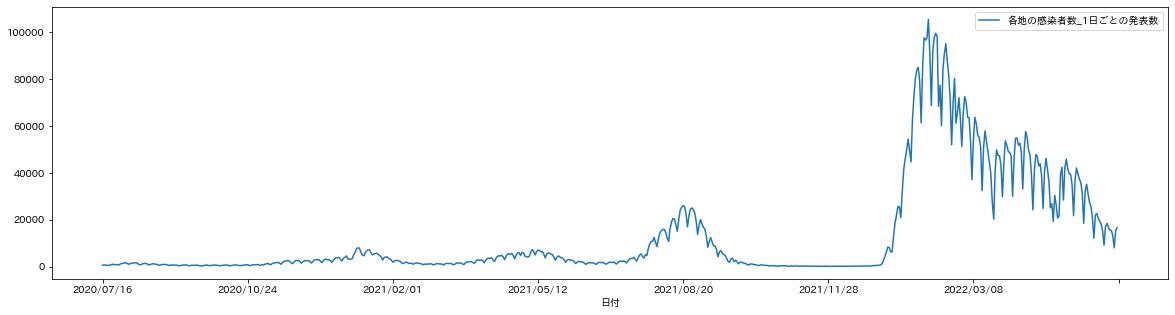

In [9]:
df_all = df.copy()
df_all = df_all.groupby('日付').sum()
df_all = df_all.loc[:,['各地の感染者数_1日ごとの発表数']]
df_all = df_all.rename(columns = {'各地の感染者数_１日毎の発表数': '全国の感染者数'})
df_all = df_all.sort_index()
df_all.tail(get_count).plot(figsize=(20,5))

# 昨日の県別感染者数で地図を色分け

In [10]:
#  d_yestに昨日の日付を記録する(todayから1日引いている)
d_yest = '{0:%Y/%m/%d}'.format(datetime.date.today() - datetime.timedelta(days=1))

In [11]:
# CSVからデータ抽出
df_yest = df.copy()
df_yest = df_yest[df_yest.日付 == d_yest]
df_yest = df_yest.set_index('都道府県コード')
df_yest = df_yest.loc[:, ['各地の感染者数_1日ごとの発表数']]

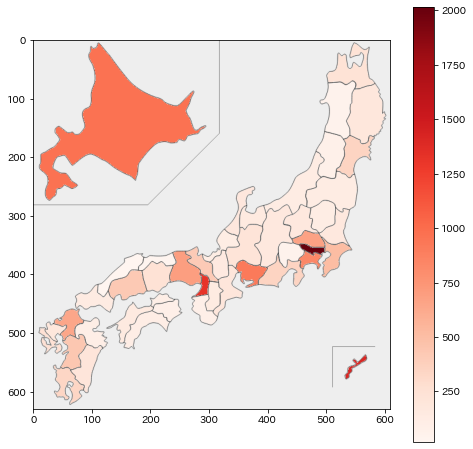

In [12]:
# japanmapで画像作成
cmap = plt.get_cmap('Reds')
norm = plt.Normalize(vmin = df_yest.各地の感染者数_1日ごとの発表数.min(),
                    vmax = df_yest.各地の感染者数_1日ごとの発表数.max())
fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
plt.subplots(figsize = (8,8))
plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
plt.imshow(picture(df_yest.各地の感染者数_1日ごとの発表数.apply(fcol)));